# Lab 01 Data Cleaning and Exploration

In this Lab, we will work with official COVID19 case data published by the Swiss government. The data can be found [here](https://github.com/openZH/covid_19/tree/master#swiss-cantons-and-principality-of-liechtenstein-unified-dataset).

It has been partially adapted from [this](https://datagy.io/pandas-data-cleaning/) tutorial.

**Note:** We will mark your tasks with 🚨 emoji. In this lab the first such task will appear relatively late.

## Fetching the Raw Data

First, we will download the raw data. Don't worry; you do not need to understand this command. The data will be saved as `swiss_covid_data.csv` in your current working directory.

In [2]:
!wget https://raw.githubusercontent.com/alisarupenyan/mldmlabs/main/lab01_dirty_data.csv -O swiss_covid_data.csv

--2024-02-26 13:18:19--  https://raw.githubusercontent.com/alisarupenyan/mldmlabs/main/lab01_dirty_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3235140 (3.1M) [text/plain]
Saving to: 'swiss_covid_data.csv'

     0K .......... .......... .......... .......... ..........  1% 2.46M 1s
    50K .......... .......... .......... .......... ..........  3% 4.36M 1s
   100K .......... .......... .......... .......... ..........  4% 10.1M 1s
   150K .......... .......... .......... .......... ..........  6% 18.0M 1s
   200K .......... .......... .......... .......... ..........  7% 5.61M 1s
   250K .......... .......... .......... .......... ..........  9% 8.47M 1s
   300K .......... .......... .......... .......... .......... 11%  128M 0s
   350K .........

Next, we try to inspect the downloaded data to get an understanding of its format. The command below will display the first 6 lines of the downloaded file.

Even though `.csv` stands for "comma separated values", often times people distribute `.csv` files with different separator characters. In this case, everything seems to be in order.

In [8]:
!head -n 6 swiss_covid_data.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In this lab, we will use the `pandas` library to analyze and clean this dataset. This library is particularly well suited to work with tabular data.

In [9]:
import pandas as pd  # we import the library with the short-name `pd`, a convention you will find everywhere online

Next, we will read the dataset:

In [11]:
covid_data = pd.read_csv('swiss_covid_data.csv')

Note that if you ever work with a `.csv` that does not include the column names in the first line, or has a different separating character, you can specify these in `pd.read_csv` with the `sep` and `header` keyword arguments. For more options, you can refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

The data is loaded as a `pd.Dataframe` which exposes many useful methods for this lab.

## Inspecting the Data

We can use the `.head()` method to get a quick idea of the kind of data we are dealing with. It will return the first `n=5` rows of the dataframe.

In [12]:
covid_data.head()

,date,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source,current_isolated,current_quarantined,current_quarantined_riskareatravel,current_quarantined_total
0,2020-02-01,00:00,GE,109.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0,NaN
1,2020-02-02,00:00,GE,115.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0,NaN
2,2020-02-03,00:00,GE,136.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0,NaN
3,2020-02-04,00:00,GE,156.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0,NaN
4,2020-02-05,00:00,GE,169.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0,NaN


Next, it is important to get a good sense what the different columns represent. Some of them have intuitive names, such as `date` and `time`, but names like `ncumul_conf` can be inscrutable.

For convenience, we copied the [data description](https://github.com/openZH/covid_19/blob/master/README.md#swiss-cantons-and-principality-of-liechtenstein-unified-dataset) below.
Be sure to study it carefully. Understanding the meaning of the data you are working with is crucial when deciding how to deal with missing values and other aspect of data cleanup!


**Metadata**

| Field Name          | Description                                | Format     | Note |
|---------------------|--------------------------------------------|------------|------|
| __date__              | Date of notification                       | YYYY-MM-DD | |
| __time__                 | Time of notification                       | HH:MM      | |
| __abbreviation_canton_and_fl__  | Abbreviation of the reporting canton       | Text       | |
| __ncumul_tested__      | Reported number of tests performed as of date| Number     | Irrespective of canton of residence |
| __ncumul_conf__          | Reported number of confirmed cases as of date| Number     | Only cases that reside in the current canton |
| __new_hosp__        | new hospitalisations since last date | Number     | Irrespective of canton of residence |
| __current_hosp__       | Reported number of hospitalised patients on date | Number     | Irrespective of canton of residence |
| __current_icu__       | Reported number of hospitalised patients in ICUs on date| Number     | Irrespective of canton of residence |
| __current_vent__        | Reported number of patients requiring invasive ventilation on date | Number     | Irrespective of canton of residence |
| __ncumul_released__     |Reported number of patients released from hospitals or reported recovered as of date| Number     | Irrespective of canton of residence |
| __ncumul_deceased__     |Reported number of deceased as of date| Number     | Only cases that reside in the current canton |
| __source__              | Source of the information                  | href       | |
| __current_isolated__       | Reported number of isolated persons on date          | Number       | Infected persons, who are not hospitalised |
| __current_quarantined__    | Reported number of quarantined persons on date       | Number       | Persons, who were in 'close contact' with an infected person, while that person was infectious, and are not hospitalised themselves |
| __current_quarantined_riskareatravel__    | Reported number of quarantined persons on date       | Number       | People arriving in Switzerland from [certain countries and areas](https://www.bag.admin.ch/bag/en/home/krankheiten/ausbrueche-epidemien-pandemien/aktuelle-ausbrueche-epidemien/novel-cov/empfehlungen-fuer-reisende/quarantaene-einreisende.html), who are required to go into quarantine.  |

Another useful method to get a quick feel for the data at hand is `.describe()` which produces a table of statistics about the different columns. By default it will only include numeric columns, but you can set `include='all'` to get an overview of all columns. Note that when computing statistics such as the mean, `NaN` values will be ignored.

In [18]:
covid_data.describe(include="all")
# try setting `include='all'`

,date,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source,current_isolated,current_quarantined,current_quarantined_riskareatravel,current_quarantined_total
count,24041,11507,24041,263.000000,23494.000000,1394.000000,20905.000000,17943.000000,7337.000000,7370.000000,21754.000000,24039,9304.000000,8926.000000,5130.000000,0.0
unique,1320,114,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339,NaN,NaN,NaN,NaN
top,2020-07-29,00:00,GE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://infocovid.smc.unige.ch/,NaN,NaN,NaN,NaN
freq,27,3622,1320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1320,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,87064.946768,59454.099047,3.806313,47.185889,7.081202,7.768570,11700.714247,346.803852,NaN,960.948087,886.834528,172.386355,NaN
std,NaN,NaN,NaN,169095.208224,114625.610981,5.597001,80.293774,12.497653,12.047893,23160.148621,414.444033,NaN,2338.229884,3864.375585,400.062536,NaN
min,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,4465.000000,2309.250000,0.000000,4.000000,1.000000,0.000000,690.000000,47.000000,NaN,41.000000,28.000000,0.000000,NaN
50%,NaN,NaN,NaN,24257.000000,17392.500000,2.000000,17.000000,3.000000,3.000000,2166.500000,178.000000,NaN,201.000000,128.500000,13.000000,NaN
75%,NaN,NaN,NaN,47067.500000,68330.500000,5.000000,51.000000,7.000000,9.000000,11854.000000,495.000000,NaN,843.250000,542.000000,158.000000,NaN


## Dealing with Missing Values

When reading the original `swiss_covid_data.csv` every cell that did not have a value was assigned the value `NaN` (not a number).

When we apply the `.isna()` method to our data, every cell of the result will contain a boolean value indicating whether that cell had a `Nan` (or `None` or similar false-y value) in it.

In [19]:
covid_data.isna()

,date,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source,current_isolated,current_quarantined,current_quarantined_riskareatravel,current_quarantined_total
0,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,True
4,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24036,False,True,False,True,False,True,False,True,True,True,False,False,True,True,True,True
24037,False,False,False,True,False,True,False,False,True,True,False,False,True,True,True,True
24038,False,True,False,True,False,True,False,True,True,True,False,False,True,True,True,True
24039,False,False,False,True,False,True,False,False,True,True,False,False,True,True,True,True


We can count the number of missing values in each column by summing over all rows:

In [24]:
covid_data.isna().sum()

date                                      0
time                                  12534
abbreviation_canton_and_fl                0
ncumul_tested                         23778
ncumul_conf                             547
new_hosp                              22647
current_hosp                           3136
current_icu                            6098
current_vent                          16704
ncumul_released                       16671
ncumul_deceased                        2287
source                                    2
current_isolated                      14737
current_quarantined                   15115
current_quarantined_riskareatravel    18911
current_quarantined_total             24041
dtype: int64

*Note*: You can specify `.sum(axis=1)` to sum over columns instead.

We notice that the `current_quarantined_total` has 24040 missing values, which corresponds to the total number of entries in the dataframe.

We can re-verify this by inspecting the unique values:

In [25]:
covid_data['current_quarantined_total'].unique()

array([nan])

We therefore suggest to drop this column from the data entirely.

This can be achieved by the `.drop()` method, as follows:

In [26]:
covid_data = covid_data.drop(columns=['current_quarantined_total'])
covid_data.head()

,date,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source,current_isolated,current_quarantined,current_quarantined_riskareatravel
0,2020-02-01,00:00,GE,109.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0
1,2020-02-02,00:00,GE,115.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0
2,2020-02-03,00:00,GE,136.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0
3,2020-02-04,00:00,GE,156.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0
4,2020-02-05,00:00,GE,169.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0


Generally, there are two approaches to deal with missing values. We can either ignore them, for example by throwing out rows that contain them, or we can try to impute a "reasonable" value.

Of course, what is "reasonable" heavily depends on the data at hand!

Let us first consider the easier approach: dropping rows that have missing entries. This can be achieved using the `.dropna()` method.

By default it will remove all rows that have at least one missing value:

In [27]:
covid_data.dropna()

,date,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source,current_isolated,current_quarantined,current_quarantined_riskareatravel
562,2020-03-24,00:00,GE,8554.0,8555.0,36.0,230.0,41.0,41.0,103.0,33.0,https://infocovid.smc.unige.ch/,1768.0,1.0,0.0
589,2020-03-25,00:00,GE,9000.0,9339.0,37.0,232.0,47.0,48.0,122.0,45.0,https://infocovid.smc.unige.ch/,1778.0,1.0,0.0
616,2020-03-26,00:00,GE,9520.0,10336.0,43.0,254.0,50.0,48.0,144.0,50.0,https://infocovid.smc.unige.ch/,1827.0,1.0,0.0
643,2020-03-27,00:00,GE,9971.0,10949.0,43.0,285.0,54.0,54.0,153.0,63.0,https://infocovid.smc.unige.ch/,1859.0,1.0,0.0
670,2020-03-28,00:00,GE,10533.0,11749.0,53.0,309.0,53.0,54.0,175.0,77.0,https://infocovid.smc.unige.ch/,1892.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,2020-05-27,00:00,GE,35777.0,23756.0,3.0,6.0,0.0,0.0,788.0,374.0,https://infocovid.smc.unige.ch/,22.0,14.0,0.0
2257,2020-05-28,00:00,GE,36026.0,23761.0,3.0,7.0,0.0,0.0,792.0,374.0,https://infocovid.smc.unige.ch/,22.0,22.0,0.0
2283,2020-05-29,00:00,GE,36302.0,23781.0,7.0,5.0,0.0,0.0,797.0,374.0,https://infocovid.smc.unige.ch/,19.0,22.0,0.0
2375,2020-06-02,00:00,GE,36769.0,23830.0,1.0,7.0,1.0,0.0,807.0,374.0,https://infocovid.smc.unige.ch/,19.0,15.0,0.0


We can see that this is too aggressive as it leaves us with only 68 out our original 24032 rows!

We can be more lax about dropping rows by either setting `how='all'`, which will only drop rows that consist entirely of missing values, or `thresh=3` (or any other integer value) which will drop rows with fewer than 3 non-missing values.

In [43]:
covid_data.dropna(thresh=3)

,date,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source,current_isolated,current_quarantined,current_quarantined_riskareatravel
0,2020-02-01,00:00,GE,109.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0
1,2020-02-02,00:00,GE,115.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0
2,2020-02-03,00:00,GE,136.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0
3,2020-02-04,00:00,GE,156.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0
4,2020-02-05,00:00,GE,169.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24036,2023-09-10,NaN,NE,NaN,92697.0,NaN,4.0,NaN,NaN,NaN,496.0,https://www.ne.ch/autorites/DFS/SCSP/medecin-c...,NaN,NaN,NaN
24037,2023-09-10,00:00,GE,NaN,251154.0,NaN,60.0,1.0,NaN,NaN,959.0,https://infocovid.smc.unige.ch/,NaN,NaN,NaN
24038,2023-09-11,NaN,NE,NaN,92700.0,NaN,9.0,NaN,NaN,NaN,496.0,https://www.ne.ch/autorites/DFS/SCSP/medecin-c...,NaN,NaN,NaN
24039,2023-09-11,00:00,GE,NaN,251162.0,NaN,66.0,1.0,NaN,NaN,959.0,https://infocovid.smc.unige.ch/,NaN,NaN,NaN


### Replacing Missing Values

We will now focus on imputing missing values.

Our data contains broadly speaking 3 types of values:
* direct and cumulative counts of populations (numerical)
* `date` and `time`
* categorical `abbreviation_canton_and_fl` and `source`

We already know that `abbreviation_canton_and_fl` and `date` do not have any missing values.

`source` has only 2 missing values, which we will ignore for now.

We will first focus on the `time` column. Looking at the dataframe console printouts, we can already guess that many rows have the value `"00:00"` as their time.

We can confirm this by counting how many times each unique `time` value appears:

In [44]:
covid_data['time'].value_counts()

time
00:00    3622
08:00    2495
10:00    1175
14:30    1162
09:00     738
         ... 
10:25       1
07:40       1
08:40       1
15:15       1
16:40       1
Name: count, Length: 114, dtype: int64

We will therefore decide to fill the missing `time` values with
`"00:00"`. This can be achieved by the `.fillna()` method:

In [45]:
covid_data['time'] = covid_data['time'].fillna("00:00")
covid_data.isna().sum()

date                                      0
time                                      0
abbreviation_canton_and_fl                0
ncumul_tested                         23778
ncumul_conf                             547
new_hosp                              22647
current_hosp                           3136
current_icu                            6098
current_vent                          16704
ncumul_released                       16671
ncumul_deceased                        2287
source                                    2
current_isolated                      14737
current_quarantined                   15115
current_quarantined_riskareatravel    18911
dtype: int64

Note that we specifically update the `time` column with a version where the missing values have been replaced. If we instead wrote `covid_data.fillna("00:00")` then every missing value in the entire dataframe would be replaced by `"00:00"`!

**(Side Note)**: If we inspect the data more closely, we can see that each canton seems to have a specific time that they usually submit the data, so filling in "00:00" agnostically might not be the perfect solution but we will consider it good enough for this lab.

Next, we will fill in current counts, such as `current_hosp`. In the lecture you have seen different approaches to determine a good value to impute. Intuitively, if we do not know how many people are currently in the hospital, a simple estimate would be to use the number of people hospitalised the day before, or the last known value in general.

This can be achieved in pandas by using the `.ffill()` (forward-fill) method. The code sniplet below shows a simple example.

In [46]:
ffill_example = pd.DataFrame({"values": [1, 2, 3, None, None, 6]})
ffill_example

,values
0,1.0
1,2.0
2,3.0
3,NaN
4,NaN
5,6.0


In [47]:
ffill_example.ffill()

,values
0,1.0
1,2.0
2,3.0
3,3.0
4,3.0
5,6.0


For our covid data this will become a little more intricate. First, we have to make sure that the data is sorted by date and time to make sure we actually forward fill the last known values. Second, we will have to do this for each canton individually, as it makes no sense to substitute a known value from Geneva in Zurich. We show how to achieve this in the next cell and unpack it afterwards:

In [48]:
ffill_columns = [
  'ncumul_tested',
  'ncumul_conf',
  'current_hosp',
  'current_icu',
  'current_vent',
  'ncumul_released',
  'ncumul_deceased',
  'current_isolated',
  'current_quarantined',
  'current_quarantined_riskareatravel',
]
for canton in covid_data['abbreviation_canton_and_fl'].unique():
  covid_data.loc[covid_data['abbreviation_canton_and_fl'] == canton, ffill_columns] = covid_data.loc[covid_data['abbreviation_canton_and_fl'] == canton, ffill_columns].ffill().fillna(0.)

covid_data

,date,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source,current_isolated,current_quarantined,current_quarantined_riskareatravel
0,2020-02-01,00:00,GE,109.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0
1,2020-02-02,00:00,GE,115.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0
2,2020-02-03,00:00,GE,136.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0
3,2020-02-04,00:00,GE,156.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0
4,2020-02-05,00:00,GE,169.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24036,2023-09-10,00:00,NE,0.0,92697.0,NaN,4.0,1.0,0.0,0.0,496.0,https://www.ne.ch/autorites/DFS/SCSP/medecin-c...,0.0,0.0,0.0
24037,2023-09-10,00:00,GE,187408.0,251154.0,NaN,60.0,1.0,1.0,973.0,959.0,https://infocovid.smc.unige.ch/,1816.0,0.0,0.0
24038,2023-09-11,00:00,NE,0.0,92700.0,NaN,9.0,1.0,0.0,0.0,496.0,https://www.ne.ch/autorites/DFS/SCSP/medecin-c...,0.0,0.0,0.0
24039,2023-09-11,00:00,GE,187408.0,251162.0,NaN,66.0,1.0,1.0,973.0,959.0,https://infocovid.smc.unige.ch/,1816.0,0.0,0.0


First, we specify which columns we will forward fill. Here we selected all current and cumulative counts.

Then we iterate over all cantons. The `.loc` method is used for complex indexing. It can be used as `.loc[row_selection, column_selection]`. The rows we select are the ones that correspond to the current canton. The expression `covid_data['abbreviation_canton_and_fl'] == canton` returns a boolean index series that indicates rows that match the current canton. We use the list of columns we want to forward fill as our column selection.

As before, we reassign all these cells by a version that has its missing values filled in. We apply the `.ffill()` method and follow it by a `fillna(0.)`. This is because missing values at the start (before any value is known) can not be forward-filled and we explicitely set them to 0 here.

Let us now see our progess:

In [49]:
covid_data.isna().sum()

date                                      0
time                                      0
abbreviation_canton_and_fl                0
ncumul_tested                             0
ncumul_conf                               0
new_hosp                              22647
current_hosp                              0
current_icu                               0
current_vent                              0
ncumul_released                           0
ncumul_deceased                           0
source                                    2
current_isolated                          0
current_quarantined                       0
current_quarantined_riskareatravel        0
dtype: int64

There are two remaining columns with missing values. For `new_hosp` we will naively fill in 0 and for `source` we will impute the string `"unknown"`.

**🚨 TASK 1A (2 Points) 🚨**

* Replace missing values in the `new_hosp` column by 0
* Replace missing values in the `source` column by the string `"unknown"`

In [67]:
# Hint refer back to where we replaced missing 'time' values by "00:00"!
# TODO
covid_data['new_hosp'] = covid_data['new_hosp'].fillna(0.)
covid_data['source'] = covid_data['source'].fillna("unknown")

new_hosp
0.0     23010
1.0       203
2.0       164
3.0       146
4.0       118
6.0        80
5.0        72
7.0        61
8.0        44
9.0        26
10.0       24
11.0       20
12.0       19
13.0        8
15.0        6
19.0        5
20.0        4
18.0        3
37.0        2
23.0        2
38.0        2
43.0        2
21.0        2
16.0        2
14.0        2
36.0        1
47.0        1
53.0        1
41.0        1
44.0        1
49.0        1
33.0        1
39.0        1
32.0        1
30.0        1
42.0        1
28.0        1
26.0        1
17.0        1
Name: count, dtype: int64

We have now eliminated all missing values!

In [65]:
covid_data.isna().sum()

date                                  0
time                                  0
abbreviation_canton_and_fl            0
ncumul_tested                         0
ncumul_conf                           0
new_hosp                              0
current_hosp                          0
current_icu                           0
current_vent                          0
ncumul_released                       0
ncumul_deceased                       0
source                                0
current_isolated                      0
current_quarantined                   0
current_quarantined_riskareatravel    0
dtype: int64

<mark>In **MOODLE**</mark>:

* upload your code snippte to fill in missing values for `new_hosp` and `source`
* upload the output of counting remaining missing values

## Dealing with Duplicate Rows

The `.duplicated()` method will tell you for each row whether it is an exact duplicate. By default it will mark the first occurrence of a row as a non-duplicate and every following occurrence as a duplicate.

In [69]:
covid_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
24036    False
24037    False
24038    False
24039    False
24040    False
Length: 24041, dtype: bool

We can check whether there are any exact duplicates by summing:

In [70]:
covid_data.duplicated().sum()

0

We can see that our dataset does not contain any duplicate columns, this is mainly because each entry has a unique `'date'` and `'time'`.

We can set the `subset=...` parameter to indicate which columns to consider for duplicate detection. Let us check whether there are duplicates, when we ignore the `'date'` and `'time'` columns:

**🚨 TASK 1B (1 Point) 🚨**

* count the number of exact duplicates when we only consider non-time colums

In [74]:
non_time_cols = [c for c in covid_data.columns if c not in {'date', 'time'}]

In [76]:
# TODO
covid_data.duplicated(subset=non_time_cols).sum()

1213

<mark>In **MOODLE**</mark>:
* upload the number of exact duplicates considering only non-time columns

There is a good chance that the duplicates are a result of our missing value imputation approach.

Here it does not seem like a good idea to drop any rows as those rows that have identical entries except date and time are not a-priori problematic.


Nevertheless, it is good to know how to remove duplicate rows for future reference.

We can do so using the `.drop_duplicates()` method, which will drop those rows that `.duplicated()` indicates as duplicates:

Don't worry about running the next cell, it will return a new dataframe with rows dropped but will not change your current version of `covid_data`.

In [79]:
covid_data.drop_duplicates(subset=non_time_cols)

,date,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source,current_isolated,current_quarantined,current_quarantined_riskareatravel
0,2020-02-01,00:00,GE,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0
1,2020-02-02,00:00,GE,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0
2,2020-02-03,00:00,GE,136.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0
3,2020-02-04,00:00,GE,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0
4,2020-02-05,00:00,GE,169.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://infocovid.smc.unige.ch/,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24036,2023-09-10,00:00,NE,0.0,92697.0,0.0,4.0,1.0,0.0,0.0,496.0,https://www.ne.ch/autorites/DFS/SCSP/medecin-c...,0.0,0.0,0.0
24037,2023-09-10,00:00,GE,187408.0,251154.0,0.0,60.0,1.0,1.0,973.0,959.0,https://infocovid.smc.unige.ch/,1816.0,0.0,0.0
24038,2023-09-11,00:00,NE,0.0,92700.0,0.0,9.0,1.0,0.0,0.0,496.0,https://www.ne.ch/autorites/DFS/SCSP/medecin-c...,0.0,0.0,0.0
24039,2023-09-11,00:00,GE,187408.0,251162.0,0.0,66.0,1.0,1.0,973.0,959.0,https://infocovid.smc.unige.ch/,1816.0,0.0,0.0


## Cleaning up the 'source' Column

Looking at the values in the `source` column, we can see that they correspond to URLs. Many of these belong to the same domain and only vary in their parameters.

🚨 **TASK 1C (1 Point)** 🚨

* inspect the unique values in the `source` column
* count the unique values in the `source` column

In [80]:
# Hint: we have already done this for different column earlier
covid_data['source'].value_counts()

source
https://infocovid.smc.unige.ch/                                                                                                                                                                                           1320
https://www.ne.ch/autorites/DFS/SCSP/medecin-cantonal/maladies-vaccinations/Documents/Covid-19-Statistiques/COVID19_PublicationInternet.xlsx                                                                              1290
https://www.baselland.ch/politik-und-behorden/direktionen/volkswirtschafts-und-gesundheitsdirektion/amt-fur-gesundheit/medizinische-dienste/kantonsarztlicher-dienst/aktuelles/covid-19-faelle-kanton-basel-landschaft    1177
https://www.zh.ch/de/gesundheit/coronavirus.html                                                                                                                                                                          1161
https://www.llv.li/files/ag/aktuelle-fallzahlen.xlsx                                                 

In [90]:
# the `.unique` method returns a numpy array, you can use the built-in `len` function to check its length

len(covid_data['source'].unique())

340

<mark>In **MOODLE**</mark>:
* report the number of unique values in the `source` column.

Let us try making this data more digestable by extracting the domain information.

For this we will use the following helper function:

In [91]:
from urllib.parse import urlparse
def extract_netloc(url):
  return urlparse(url).netloc

# lets try it out
url = 'https://www.baselland.ch/politik-und-behorden/direktionen/volkswirtschafts-und-gesundheitsdirektion/amt-fur-gesundheit/medizinische-dienste/kantonsarztlicher-dienst/aktuelles/covid-19-faelle-kanton-basel-landschaft'
print(extract_netloc(url))

www.baselland.ch


We can apply this function to the `source` column to replace it with a cleaned version:

In [92]:
covid_data['source'] = covid_data['source'].apply(extract_netloc)
covid_data

,date,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source,current_isolated,current_quarantined,current_quarantined_riskareatravel
0,2020-02-01,00:00,GE,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,infocovid.smc.unige.ch,1.0,0.0,0.0
1,2020-02-02,00:00,GE,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,infocovid.smc.unige.ch,1.0,0.0,0.0
2,2020-02-03,00:00,GE,136.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,infocovid.smc.unige.ch,1.0,0.0,0.0
3,2020-02-04,00:00,GE,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,infocovid.smc.unige.ch,1.0,0.0,0.0
4,2020-02-05,00:00,GE,169.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,infocovid.smc.unige.ch,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24036,2023-09-10,00:00,NE,0.0,92697.0,0.0,4.0,1.0,0.0,0.0,496.0,www.ne.ch,0.0,0.0,0.0
24037,2023-09-10,00:00,GE,187408.0,251154.0,0.0,60.0,1.0,1.0,973.0,959.0,infocovid.smc.unige.ch,1816.0,0.0,0.0
24038,2023-09-11,00:00,NE,0.0,92700.0,0.0,9.0,1.0,0.0,0.0,496.0,www.ne.ch,0.0,0.0,0.0
24039,2023-09-11,00:00,GE,187408.0,251162.0,0.0,66.0,1.0,1.0,973.0,959.0,infocovid.smc.unige.ch,1816.0,0.0,0.0


In [93]:
sorted(covid_data['source'].unique())

['',
 'corona.so.ch',
 'covid-kennzahlen.apps.be.ch',
 'coviddashboard.sh.ch',
 'docs.google.com',
 'infocovid.smc.unige.ch',
 'services1.arcgis.com',
 'so.ch',
 'twitter.com',
 'www.ag.ch',
 'www.ai.ch',
 'www.ar.ch',
 'www.baselland.ch',
 'www.be.ch',
 'www.besondere-lage.sites.be.ch',
 'www.coronavirus.bs.ch',
 'www.fr.ch',
 'www.gd.bs.ch',
 'www.gesundheit.bs.ch',
 'www.gesundheit.bs.ch https:',
 'www.gl.ch',
 'www.infosan.vd.ch',
 'www.jura.ch',
 'www.llv.li',
 'www.lustat.ch',
 'www.ne.ch',
 'www.nw.ch',
 'www.ow.ch',
 'www.regierung.li',
 'www.sg.ch',
 'www.sz.ch',
 'www.tg.ch',
 'www.ur.ch',
 'www.vd.ch',
 'www.vs.ch',
 'www.zg.ch',
 'www.zh.ch',
 'www4.ti.ch']

The `.apply` method applies the function passed as an argument to each element.

Let's now save the final cleaned dataset:

In [94]:
covid_data.to_csv('swiss_covid_data_clean.csv')

At this point, we consider the data cleaning process done.

ℹ️ **In the next cell, we will download a reference version of the cleaned data that you can use, if you did not manage to implement part of the process so far.**

In [ ]:
!wget https://raw.githubusercontent.com/alisarupenyan/mldmlabs/main/lab01_clean_data.csv -O lab01_clean_data.csv

In [ ]:
# uncomment the next line, if you want to use reference data
# covid_data = pd.read_csv('lab01_clean_data.csv')

## Using the Clean Data

### **🚨 TASK 2 (3 Points) 🚨**

Now that you have a clean dataset, it is time for some data exploration.

* think of a question that you could try to answer with the given dataset
* use summary statistics and/or visualizations to try to answer your question

<mark>On **Moodle**</mark> _upload a <mark>PDF</mark>_ answering the following questions:
* What was your initial question or idea?
* How did you proceed to arrive at an answer?
* What are your results?
* Include code-snippets, plots, and similar to support your answer.

Below, we include some code that helps you plot time-dependent variables.
Note that **it is _NOT_ mandatory to produce any plots for this assignment**!

In [102]:
# You might want to plot things
from matplotlib import pyplot as plt

In [103]:
# replace 'date' string by parsed datetime objects
# this can help if you want to use matplotlib to create a time plot
# you do not have to understand this
from datetime import datetime as dt
covid_data['date'] = pd.to_datetime(covid_data['date'].apply(lambda t: dt.strptime(t, "%Y-%m-%d")))

TypeError: strptime() argument 1 must be str, not Timestamp

In [ ]:
# extract dates for Geneva
x = covid_data.loc[covid_data['abbreviation_canton_and_fl'] == 'GE', ['date']]
# extract the 'ncumul_test' column for Geneva
y = covid_data.loc[covid_data['abbreviation_canton_and_fl'] == 'GE', ['ncumul_tested']]

# plot
plt.plot_date(x, y)

In [ ]:
# Generic scatter-plot that does not include a time variable
plt.scatter(covid_data['ncumul_tested'], covid_data['ncumul_deceased'])

# My code

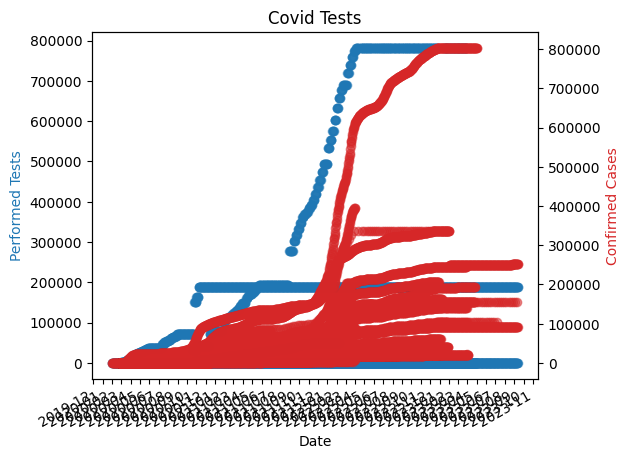

In [129]:
from matplotlib import pyplot as plt
from datetime import datetime as dt
import matplotlib.dates as mdates

covid_data_clean = pd.read_csv('swiss_covid_data_clean.csv')

covid_data_clean['date'] = pd.to_datetime(covid_data_clean['date'])

x = covid_data_clean['date']
fig,y1 = plt.subplots()
tested = covid_data_clean['ncumul_tested']
confirmed = covid_data_clean['ncumul_conf']

y1Color = 'tab:blue'
y1.set_xlabel('Date')
y1.set_ylabel('Performed Tests', color=y1Color)
y1.scatter(x, tested, color=y1Color, alpha=0.5)


y2Color = 'tab:red'
y2 = y1.twinx()
y2.set_ylabel('Confirmed Cases', color=y2Color)
y2.scatter(x, confirmed, color=y2Color, alpha=0.5)

y1.xaxis.set_major_locator(mdates.MonthLocator())
y1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title("Covid Tests")

fig.tight_layout()
fig.autofmt_xdate() 
plt.show()

In [ ]:




x = covid_data_clean['date']
fig,y1 = plt.subplots()
tested = covid_data_clean['ncumul_tested']
confirmed = covid_data_clean['ncumul_conf']

y1Color = 'tab:blue'
y1.set_xlabel('Date')
y1.set_ylabel('Performed Tests', color=y1Color)
y1.plot(x, tested, color=y1Color)

y2Color = 'tab:red'
y2 = y1.twinx()
y2.set_ylabel('Confirmed Cases', color=y2Color)
y2.plot(x, confirmed, color=y2Color)

plt.title("Covid Tests")

fig.tight_layout()

plt.show()

In [ ]:
from matplotlib import pyplot as plt

covid_data_clean = pd.read_csv('swiss_covid_data_clean.csv')


keep_date_tested_conf = ['date', 'ncumul_tested', 'ncumul_conf']

covid_data_date = covid_data_clean[keep_date_tested_conf]

covid_data_date['date'] = pd.to_datetime(covid_data_date['date'])